<a href="https://colab.research.google.com/github/CharlotteHoyt/KWK-Goldman-Sachs-ML-Final-Project/blob/main/Charlotte_KWK_Machine_Learning_x_Finance_Challenge_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Economic Indicators of World Happiness
---

## ⚠️ Agreement Not to Use AI Tools in This Text Cell

By completing this text cell, you confirm that **you did not use any AI tools or large language models (LLMs) to generate text, code, or analysis for its content**.  

*Purpose:* This ensures that your insights, reasoning, and work in this section are fully your own.  

**Please write your responses/code manually.**

-----------------

## Research Question / Problem Statement
How do economic factors affect happiness, well-being, and societal progress around the world?

-----------------

## List of Datasets
**World Happiness Index and Inflation Dataset**

**Source:** https://www.kaggle.com/datasets/agrafintech/world-happiness-index-and-inflation-dataset

**Brief Description:** This dataset places World Happiness Index data alongside inflation metrics to explore relationships between economic conditions and happiness, well-being, and societal progress. The data is from 2015 to 2023 and represents 148 different countries.

**Why I Chose It:** I chose this dataset because it was available for download in a CSV format, it has a high usability score, and I thought it would be interesting to explore how economic prosperity and happiness levels are related (or not).

-----------------

## Summary of Dataset Use
#### Model 1
(Predicting World Happiness Index Score From GDP Per Capita, Predicting World Happiness Index Score From Perceptions of Corruption)
*   **Model Type**: Linear Regression

*   **Dataset(s) Used**: World Happiness Index and Inflation Dataset

*   **Metric(s) Used**: I evaluated my models' performance using the coefficient, intercept, mean squared error, and R^2 score.

*   **Key Insight(s)**: I made four linear regression models total. The first two predict World Happiness Index score from features with a high positive correlation in my correlation matrix. The second two use a feature I engineered, Nominal GDP Per Capita. My linear regression model predicting World Happiness Index score from ("normalized"/real) GDP Per Capita revealed that there is a positive correlation between a country's World Happiness Index score and GDP Per Capita. My linear regression model predicting World Happiness Index Score from Perceptions of Corruption showed a weak positive correlation between World Happiness Index score and Perceptions of Corruption. This shows that two factors related to finance do have a marked influence on a country's World Happiness Index score. After exploring relationships with the provided features, I used feature engineering to make a Nominal GDP Per Capita column. Nominal GDP Per Capita is not adjusted for inflation. My linear regresson model predicting World Happiness Index score from Nominal GDP Per Capita demonstrated a weak negative correlation between World Happiness Index score and Nominal GDP Per Capita. This reveals that a "raw" GDP Per Capita may fail to show whether an increase is due to inflation or economic growth, and is a less reliable indicator of a country's World Happiness Index score. My linear regression model predicting Nominal GDP Per Capita from Headline Consumer Price Inflation showed a weak positive correlation between Nominal GDP Per Capita and Headline Consumer Price Inflation. This makes sense since, as prices rise, Nominal GDP Per Capita will appear higher due to the effects of inflation.

*   **AI/LLM Use (If Any)**: N/A

#### Model 2
(Predicting World Happiness Index Score, Predicting World Happiness Index Score With Finance Related Features/Those With a High Feature Importance, Predicting GDP Per Capita With features Related to Inflation Rates)
*   **Model Type**: Regression Tree

*   **Dataset(s) Used**: World Happiness Index and Inflation Dataset

*   **Metric(s) Used**: I evaluated my models' performance using mean squared error, root mean squared error, and R^2 score.

*   **Key Insight(s)**: I made three regression tree models. The first predicts World Happiness Index scores using all features. I used this model to understand feature importance, quantify each variable's contribution to the model's prediction, and improve/simplify my next model. This model revealed that while GDP Per Capita has the most influence on the model's output, some other finance related features had no impact on the model's prediction. My second regression tree model predicts World Happiness Index score using finance related features (those with the highest feature importance). This showed that GDP Per Capita is one of the more influential and relevant features when predicing a country's World Happiness Index score. My third regression tree model predicts ("normalized"/real) GDP Per Capita using features related to inflation rates. This demonstrated that inflation rates can be somewhat useful in predicting GDP Per Capita values (even when they are adjusted for inflation).

*   **AI/LLM Use (If Any)**: N/A

-----------------

## Overall AI/LLM Usage
I did not use any AI or LLM tools during this project process. All of the responses and code in this notebook were written by me without the help of AI tools. The list of online sources I used as references is down below.

-----------------

## Results
My project shows that, to a certain extent, money does affect happiness. Broadly, happiness increases with wealth. A country's World Happiness Index score can be influenced by economic conditions, such as GDP Per Capita. GDP Per Capita is one variable used to measure differences in happiness, and is affected by inflation rates. The dataset reports "normalized" (real) GDP Per Capita, which is adjusted for inflation. Nominal GDP Per Capita (which is a "raw" figure that can be distorted by inflation) is positively correlated with inflation, which makes sense. Economic trends and inflation metrics are to some extent related to World Happiness Index scores but other social well-being factors are also valuable measures of happiness.

-----------------

## Conclusion and Recommendations
Economic conditions do affect happiness at least a little bit. Financial resources can bring happiness by fulfilling basic needs, buying experiences, and lowering stress. However, economic growth is an incomplete measure of success and happiness. Global happiness is a much more multifacted conversation, where GDP Per Capita is just one of six factors considered in the World Happiness Report. This in itself indicates that there is more to consider when measuring a country's happiness than economic conditions alone. I enjoyed exploring how financial metrics (specifically inflation, GDP Per Capita, and Perceptions of Corruption) relate to happiness levels. In the future, it would be interesting to explore if money has the same influence in prosperous countries. Additionally, while GDP Per Capita as an indicator can reveal inequalities between different countries, it doesn't show pay disparities within countries. Wealth distribution is an important consideration, which could be investigated through the Gini coefficent (which measures income distribution and income inequality) or median income of a country (since income concentration can "pull up" the average and not represent the "typical" person).


-----------------

## References
**1. pandas.DataFrame.rename**

**Link:** https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

**Usage:** To understand how to rename columns in a pandas DataFrame.


**2. Color Palette for HTML Headers and Subheaders**

**Link:** https://colorhunt.co/palette/fff58affbbe1dd7bdfb3bfff

**Usage:** To color my headers and subheaders.


**3. Display HTML Inside Jupyter Notebook in Google Colab**

**Link:** https://stackoverflow.com/questions/51576756/display-render-an-html-file-inside-jupyter-notebook-on-google-colab-platform

**Usage:** To make colorful, more distinct headers and subheaders to visually separate sections of my code.


**4. List of Named Matplotlib Colors**

**Link:** https://matplotlib.org/3.1.1/gallery/color/named_colors.html

**Usage:** Referenced to recolor my plots.


**5. DecisionTreeRegressor**

**Link:** https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

**Usage:** Used this documentation to understand scikit-learn's DecisionTreeRegressor. I referenced this since I have a regression target (World Happiness Index scores) and I wanted to predict continuous numerical values. Reading this page helped me make a regression tree. It also helped me to understand how regression trees differ from classifier trees.


**6. How to Evaluate the Accuracy of a Regression Tree Model**

**Link:** https://datascience.stackexchange.com/questions/74962/evaluating-model-accuracy-on-a-testing-data-set-for-a-decisiontreereegressor-mod

**Usage:** Used this data science discussion board to understand how to evaluate the accuracy of a regression tree. This confirmed my understanding that you do not evaluate classifier trees and regression trees in the same way. The goal of a classifier tree is to predict a class/discrete category, while the goal of a regression tree is to predict a continuous numerical value. For this reason, they use different evaluation metrics.


**7. World Happiness Report Wikipedia Page**

**Link:** https://en.wikipedia.org/wiki/World_Happiness_Report

**Usage:** Referenced this page to get a very general overview of the World Happiness Report, the methodology of the survey, as well as the citicisms and history of the publication.


**7. Calculating Nominal GDP Per Capita**

**Link:** https://corporatefinanceinstitute.com/resources/economics/nominal-gross-domestic-product/

**Usage:** This source taught me how to calculate nominal GDP per capita from "normalized" (real) GDP per capita and the GDP deflator.


**8. World Happiness Report Website**

**Link:** https://www.worldhappiness.report

**Usage:** I looked at this website to learn more about the World Happiness Report, the history of the report, and the six key variables used.


**9. Beyond GDP: Economics and Happiness**

**Link:** https://econreview.studentorg.berkeley.edu/beyond-gdp-economics-and-happiness/

**Usage:** This is an article published by the Berkeley Economic Review staff offering that human happiness is affected my much more than just output per person. It also provides the important point that how wealth gets spent and other variables (support, life expectancy, freedom to make life choices, generosity, and freedom from corruption) are important in explaining happiness.


**10. Gross Domestic Product Wikipedia Page**

**Link:** https://en.wikipedia.org/wiki/Gross_domestic_product

**Usage:** Read into the major components of GDP to make reccomendations and tell an effective "data story" in my slide deck.

---

In [1]:
import IPython

In [2]:
IPython.display.HTML("<h1 style = 'font-weight: bold; padding: 15px; color: #DD7BDF; text-align: center; font-family: Verdana, sans-serif; background-color: #FFBBE1'>Mounting Google Drive and Loading Data</h1>")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from scipy import stats

df = pd.read_csv("/content/drive/My Drive/KWK_ML/WHI_Inflation.csv")
df.head()

Mounted at /content/drive


,Country,Year,Headline Consumer Price Inflation,Energy Consumer Price Inflation,Food Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,GDP deflator Index growth rate,Continent/Region,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2015,-0.660,-4.250000,-0.840000,0.219999,NaN,2.665090,South Asia,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190
1,Afghanistan,2016,4.380,2.070000,5.670000,5.192760,NaN,-2.409509,South Asia,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120
2,Afghanistan,2017,4.976,4.440000,6.940000,5.423228,NaN,2.404000,South Asia,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158
3,Afghanistan,2018,0.630,1.474185,-1.045952,-0.126033,NaN,2.071208,South Asia,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000
4,Afghanistan,2019,2.302,-2.494359,3.794770,NaN,NaN,6.520928,South Asia,3.203,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 1232 non-null   object 
 1   Year                                    1232 non-null   int64  
 2   Headline Consumer Price Inflation       1200 non-null   float64
 3   Energy Consumer Price Inflation         1090 non-null   float64
 4   Food Consumer Price Inflation           1130 non-null   float64
 5   Official Core Consumer Price Inflation  734 non-null    float64
 6   Producer Price Inflation                769 non-null    float64
 7   GDP deflator Index growth rate          1211 non-null   float64
 8   Continent/Region                        1232 non-null   object 
 9   Score                                   1232 non-null   float64
 10  GDP per Capita                          1232 non-null   floa

In [5]:
IPython.display.HTML("<h1 style = 'font-weight: bold; padding: 15px; color: #DD7BDF; text-align: center; font-family: sans-serif; background-color: #FFBBE1'>Exploratory Data Analysis</h1>")

In [6]:
IPython.display.HTML("<h2 style = 'font-weight: bold; padding: 10px; color: #FFF58A; text-align: center; font-family: sans-serif; background-color: #B3BFFF'>Rename Columns</h1>")

In [7]:
# Rename columns to use the same casing conventions.
df.rename(columns = {"GDP deflator Index growth rate": "GDP Deflator Index Growth Rate",
                     "GDP per Capita": "GDP Per Capita",
                     "Social support": "Social Support",
                     "Healthy life expectancy at birth": "Healthy Life Expectancy at Birth",
                     "Freedom to make life choices": "Freedom to Make Life Choices",
                     "Perceptions of corruption": "Perceptions of Corruption"}, inplace = True)

df.head()

,Country,Year,Headline Consumer Price Inflation,Energy Consumer Price Inflation,Food Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,GDP Deflator Index Growth Rate,Continent/Region,Score,GDP Per Capita,Social Support,Healthy Life Expectancy at Birth,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
0,Afghanistan,2015,-0.660,-4.250000,-0.840000,0.219999,NaN,2.665090,South Asia,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190
1,Afghanistan,2016,4.380,2.070000,5.670000,5.192760,NaN,-2.409509,South Asia,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120
2,Afghanistan,2017,4.976,4.440000,6.940000,5.423228,NaN,2.404000,South Asia,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158
3,Afghanistan,2018,0.630,1.474185,-1.045952,-0.126033,NaN,2.071208,South Asia,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000
4,Afghanistan,2019,2.302,-2.494359,3.794770,NaN,NaN,6.520928,South Asia,3.203,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 1232 non-null   object 
 1   Year                                    1232 non-null   int64  
 2   Headline Consumer Price Inflation       1200 non-null   float64
 3   Energy Consumer Price Inflation         1090 non-null   float64
 4   Food Consumer Price Inflation           1130 non-null   float64
 5   Official Core Consumer Price Inflation  734 non-null    float64
 6   Producer Price Inflation                769 non-null    float64
 7   GDP Deflator Index Growth Rate          1211 non-null   float64
 8   Continent/Region                        1232 non-null   object 
 9   Score                                   1232 non-null   float64
 10  GDP Per Capita                          1232 non-null   floa

In [9]:
IPython.display.HTML("<h2 style = 'font-weight: bold; padding: 10px; color: #FFF58A; text-align: center; font-family: sans-serif; background-color: #B3BFFF'>Calculate Measures of Central Tendency</h1>")

In [10]:
cols = ["Year",
        "Headline Consumer Price Inflation",
        "Energy Consumer Price Inflation",
        "Food Consumer Price Inflation",
        "Official Core Consumer Price Inflation",
        "Producer Price Inflation",
        "GDP Deflator Index Growth Rate",
        "Score",
        "GDP Per Capita",
        "Social Support",
        "Healthy Life Expectancy at Birth",
        "Freedom to Make Life Choices",
        "Generosity",
        "Perceptions of Corruption"]

# Calculate measures of central tendency for numeric variables in the dataset.
for col in cols:
  print(f"\n--- {col.upper()} ---")

  # Calculate mean.
  mean = df[col].mean()
  print(f"Mean: {mean}")

  # Calculate median.
  median = df[col].median()
  print(f"Median: {median}")

  # Calculate mode.
  mode_result = stats.mode(df[col], keepdims = True)
  mode = mode_result.mode[0]
  count_mode = mode_result.count[0]
  print(f"Mode: {mode} (appears {count_mode} times)")


--- YEAR ---
Mean: 2018.8952922077922
Median: 2019.0
Mode: 2015 (appears 142 times)

--- HEADLINE CONSUMER PRICE INFLATION ---
Mean: 7.395445129263787
Median: 3.4761463897560256
Mode: nan (appears 32 times)

--- ENERGY CONSUMER PRICE INFLATION ---
Mean: 6.424232699590625
Median: 2.769177594333237
Mode: nan (appears 142 times)

--- FOOD CONSUMER PRICE INFLATION ---
Mean: 8.030094019526146
Median: 3.7289971113204956
Mode: nan (appears 102 times)

--- OFFICIAL CORE CONSUMER PRICE INFLATION ---
Mean: 3.512611817533167
Median: 2.2456727027893066
Mode: nan (appears 498 times)

--- PRODUCER PRICE INFLATION ---
Mean: 5.841886827375673
Median: 2.7292556457966253
Mode: nan (appears 463 times)

--- GDP DEFLATOR INDEX GROWTH RATE ---
Mean: 7.070015379547317
Median: 3.244246270708621
Mode: nan (appears 21 times)

--- SCORE ---
Mean: 5.499000649271104
Median: 5.538949913
Mode: 6.125 (appears 4 times)

--- GDP PER CAPITA ---
Mean: 1.0307665294569806
Median: 1.0514999999999999
Mode: 0.0 (appears 6 ti

In [11]:
IPython.display.HTML("<h2 style = 'font-weight: bold; padding: 10px; color: #FFF58A; text-align: center; font-family: sans-serif; background-color: #B3BFFF'>Calculate Spread and Variation</h1>")

In [12]:
for col in cols:
    print(f"\n--- {col.upper()} ---")

    min = df[col].min()
    print(f"Min: {min}")

    max = df[col].max()
    print(f"Max: {max}")

    range = max - min
    print(f"Range: {range}")

    quartile_1 = df[col].quantile(0.25)
    quartile_3 = df[col].quantile(0.75)
    interquartile_range = quartile_3 - quartile_1
    print(f"IQR: {interquartile_range}")

    standard_deviation = df[col].std()
    print(f"Standard Deviation: {standard_deviation}")


--- YEAR ---
Min: 2015
Max: 2023
Range: 8
IQR: 4.0
Standard Deviation: 2.5546015719786634

--- HEADLINE CONSUMER PRICE INFLATION ---
Min: -3.7529959678649902
Max: 557.21
Range: 560.962995967865
IQR: 5.473448762155316
Standard Deviation: 25.165913924329914

--- ENERGY CONSUMER PRICE INFLATION ---
Min: -23.8799991607666
Max: 306.431673052363
Range: 330.3116722131296
IQR: 6.493733568787575
Standard Deviation: 16.591503196518637

--- FOOD CONSUMER PRICE INFLATION ---
Min: -22.030000686645508
Max: 601.020235612423
Range: 623.0502362990685
IQR: 8.02921921415329
Standard Deviation: 26.170251398346913

--- OFFICIAL CORE CONSUMER PRICE INFLATION ---
Min: -28.619415283203125
Max: 58.85186307
Range: 87.47127835320313
IQR: 3.585155189037323
Standard Deviation: 5.513661490731723

--- PRODUCER PRICE INFLATION ---
Min: -83.33978077593912
Max: 128.47663756170698
Range: 211.8164183376461
IQR: 8.716851035342115
Standard Deviation: 13.679283858679486

--- GDP DEFLATOR INDEX GROWTH RATE ---
Min: -26.1000

In [13]:
IPython.display.HTML("<h2 style = 'font-weight: bold; padding: 10px; color: #FFF58A; text-align: center; font-family: sans-serif; background-color: #B3BFFF'>Visualizations of Spread (Box Plots)</h1>")

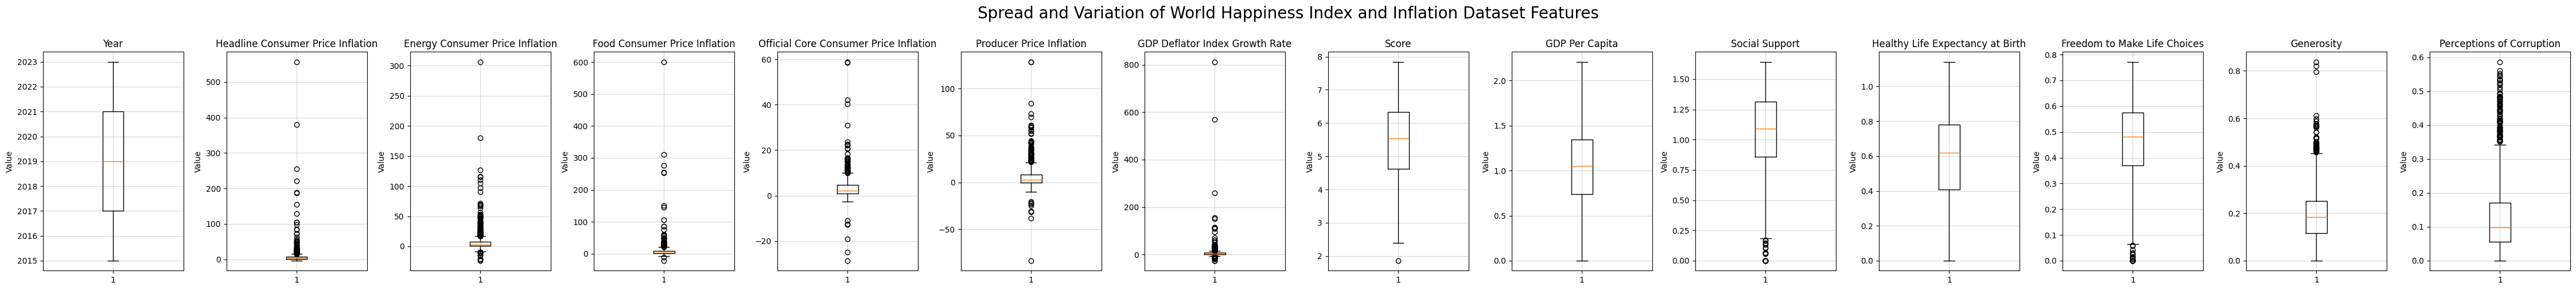

In [14]:
import matplotlib.pyplot as plt

# Numeric columns to visualize.
cols = ["Year",
        "Headline Consumer Price Inflation",
        "Energy Consumer Price Inflation",
        "Food Consumer Price Inflation",
        "Official Core Consumer Price Inflation",
        "Producer Price Inflation",
        "GDP Deflator Index Growth Rate",
        "Score",
        "GDP Per Capita",
        "Social Support",
        "Healthy Life Expectancy at Birth",
        "Freedom to Make Life Choices",
        "Generosity",
        "Perceptions of Corruption"]

# Create box plot for each feature.
fig, axes = plt.subplots(nrows = 1, ncols = 14, figsize = (45, 5))

for i, col in enumerate(cols):
  axes[i].set_title(col)
  axes[i].set_ylabel("Value")
  axes[i].boxplot(df[col].dropna(), vert = True)
  axes[i].grid(True, linestyle = "-", alpha = 0.5)

plt.suptitle("Spread and Variation of World Happiness Index and Inflation Dataset Features", fontsize = 20, y = 1)
plt.tight_layout()
plt.show()

In [15]:
IPython.display.HTML("<h2 style = 'font-weight: bold; padding: 10px; color: #FFF58A; text-align: center; font-family: sans-serif; background-color: #B3BFFF'>Correlation Matrix</h1>")

In [16]:
# Numeric columns to look at.
cols = ["Year",
        "Headline Consumer Price Inflation",
        "Energy Consumer Price Inflation",
        "Food Consumer Price Inflation",
        "Official Core Consumer Price Inflation",
        "Producer Price Inflation",
        "GDP Deflator Index Growth Rate",
        "Score",
        "GDP Per Capita",
        "Social Support",
        "Healthy Life Expectancy at Birth",
        "Freedom to Make Life Choices",
        "Generosity",
        "Perceptions of Corruption"]

# Display the correlation matrix.
df[cols].corr()

,Year,Headline Consumer Price Inflation,Energy Consumer Price Inflation,Food Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,GDP Deflator Index Growth Rate,Score,GDP Per Capita,Social Support,Healthy Life Expectancy at Birth,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
Year,1.000000,0.090641,0.206466,0.153506,0.225981,0.316968,0.100608,0.057852,0.332313,0.014955,-0.150402,0.297570,-0.294839,0.039235
Headline Consumer Price Inflation,0.090641,1.000000,0.810574,0.930110,0.878240,0.704857,0.674593,-0.199939,-0.079311,-0.114423,-0.159840,-0.130848,-0.045646,-0.067766
Energy Consumer Price Inflation,0.206466,0.810574,1.000000,0.751257,0.395492,0.653704,0.619768,-0.135052,0.039931,-0.089555,-0.129704,-0.042858,-0.068237,-0.019663
Food Consumer Price Inflation,0.153506,0.930110,0.751257,1.000000,0.702189,0.653051,0.864982,-0.171712,-0.022762,-0.081649,-0.116515,-0.099959,-0.070262,-0.078781
Official Core Consumer Price Inflation,0.225981,0.878240,0.395492,0.702189,1.000000,0.503089,0.674664,-0.224613,-0.008524,-0.085290,-0.358293,-0.141493,-0.138080,-0.104560
Producer Price Inflation,0.316968,0.704857,0.653704,0.653051,0.503089,1.000000,0.779785,-0.078300,0.107347,-0.093354,-0.163686,0.030858,-0.166508,-0.061562
GDP Deflator Index Growth Rate,0.100608,0.674593,0.619768,0.864982,0.674664,0.779785,1.000000,-0.143874,-0.054971,-0.068147,-0.135997,-0.075051,-0.043975,-0.045112
Score,0.057852,-0.199939,-0.135052,-0.171712,-0.224613,-0.078300,-0.143874,1.000000,0.739683,0.657575,0.702422,0.565723,0.098285,0.436428
GDP Per Capita,0.332313,-0.079311,0.039931,-0.022762,-0.008524,0.107347,-0.054971,0.739683,1.000000,0.550553,0.561899,0.456812,-0.146000,0.342415
Social Support,0.014955,-0.114423,-0.089555,-0.081649,-0.085290,-0.093354,-0.068147,0.657575,0.550553,1.000000,0.578898,0.370869,0.025838,0.169471


In [17]:
IPython.display.HTML("<h1 style = 'font-weight: bold; padding: 15px; color: #DD7BDF; text-align: center; font-family: sans-serif; background-color: #FFBBE1'>Cleaning Data</h1>")

In [18]:
IPython.display.HTML("<h2 style = 'font-weight: bold; padding: 10px; color: #FFF58A; text-align: center; font-family: sans-serif; background-color: #B3BFFF'>Handling Missing Values</h1>")

In [19]:
# See which columns contain missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 1232 non-null   object 
 1   Year                                    1232 non-null   int64  
 2   Headline Consumer Price Inflation       1200 non-null   float64
 3   Energy Consumer Price Inflation         1090 non-null   float64
 4   Food Consumer Price Inflation           1130 non-null   float64
 5   Official Core Consumer Price Inflation  734 non-null    float64
 6   Producer Price Inflation                769 non-null    float64
 7   GDP Deflator Index Growth Rate          1211 non-null   float64
 8   Continent/Region                        1232 non-null   object 
 9   Score                                   1232 non-null   float64
 10  GDP Per Capita                          1232 non-null   floa

In [20]:
# Drop the Official Core Consumer Price Inflation column since most values are missing.
df.drop(columns = ["Official Core Consumer Price Inflation"], inplace = True)

In [21]:
# Drop the Producer Price Inflation column since most values are missing.
df.drop(columns = ["Producer Price Inflation"], inplace = True)

In [22]:
# Use the median to fill in missing data in the Headline Consumer Price Inflation column.
median_col_2 = df["Headline Consumer Price Inflation"].median()
df["Headline Consumer Price Inflation"] = df["Headline Consumer Price Inflation"].fillna(median_col_2)

In [23]:
# Use the median to fill in missing data in the Energy Consumer Price Inflation column.
median_col_3 = df["Energy Consumer Price Inflation"].median()
df["Energy Consumer Price Inflation"] = df["Energy Consumer Price Inflation"].fillna(median_col_3)

In [24]:
# Use the median to fill in missing data in the Food Consumer Price Inflation column.
median_col_4 = df["Food Consumer Price Inflation"].median()
df["Food Consumer Price Inflation"] = df["Food Consumer Price Inflation"].fillna(median_col_4)

In [25]:
# Use the median to fill in missing data in the GDP Deflator Index Growth Rate column.
median_col_7 = df["GDP Deflator Index Growth Rate"].median()
df["GDP Deflator Index Growth Rate"] = df["GDP Deflator Index Growth Rate"].fillna(median_col_7)

In [26]:
# Use the median to fill in missing data in the Perceptions of Corruption column.
median_col_15 = df["Perceptions of Corruption"].median()
df["Perceptions of Corruption"] = df["Perceptions of Corruption"].fillna(median_col_15)

In [27]:
# Run df.info() to see if the columns have updated as expected. (No columns should contain any missing values.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            1232 non-null   object 
 1   Year                               1232 non-null   int64  
 2   Headline Consumer Price Inflation  1232 non-null   float64
 3   Energy Consumer Price Inflation    1232 non-null   float64
 4   Food Consumer Price Inflation      1232 non-null   float64
 5   GDP Deflator Index Growth Rate     1232 non-null   float64
 6   Continent/Region                   1232 non-null   object 
 7   Score                              1232 non-null   float64
 8   GDP Per Capita                     1232 non-null   float64
 9   Social Support                     1232 non-null   float64
 10  Healthy Life Expectancy at Birth   1232 non-null   float64
 11  Freedom to Make Life Choices       1232 non-null   float

In [28]:
IPython.display.HTML("<h1 style = 'font-weight: bold; padding: 15px; color: #DD7BDF; text-align: center; font-family: sans-serif; background-color: #FFBBE1'>Model 1: Linear Regression</h1>")

In [29]:
IPython.display.HTML("<h2 style = 'font-weight: bold; padding: 10px; color: #FFF58A; text-align: center; font-family: sans-serif; background-color: #B3BFFF'>Train and Evaluate Model (Predicting World Happiness Index Score From GDP Per Capita)</h1>")

--- MODEL EVALUATION ---
Coefficent (Slope): 1.897446527599819
Intercept: 3.529473402904175
Mean Squared Error: 0.609678864259587
R^2 Score: 0.47038398335560805



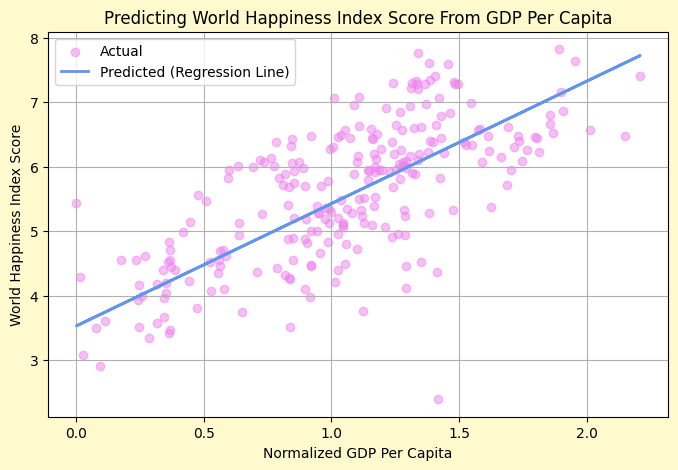

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define features (X) and target (y).
X = df[["GDP Per Capita"]]
y = df["Score"]

# Split into training and testing sets (80% train, 20% test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train the model.
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test set.
y_pred = model.predict(X_test)

# Evaluate performance (coefficent, intercept, MSE, and R^2 score).
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- MODEL EVALUATION ---")
print(f"Coefficent (Slope): {model.coef_[0]}" )
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}\n")

# Visualize results.
plt.figure(figsize = (8, 5), facecolor = "lemonchiffon")
plt.scatter(X_test, y_test, color = "violet", alpha = 0.5, label = "Actual")
plt.plot(X_test, y_pred, color = "cornflowerblue", linewidth = 2, label = "Predicted (Regression Line)")
plt.title("Predicting World Happiness Index Score From GDP Per Capita")
plt.xlabel("Normalized GDP Per Capita")
plt.ylabel("World Happiness Index Score")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
IPython.display.HTML("<h2 style = 'font-weight: bold; padding: 10px; color: #FFF58A; text-align: center; font-family: sans-serif; background-color: #B3BFFF'>Train and Evaluate Model (Predicting World Happiness Index Score From Perceptions of Corruption)</h1>")

--- MODEL EVALUATION ---
Coefficent (Slope): 4.452858170440527
Intercept: 4.879081384041976
Mean Squared Error: 0.9810872706087523
R^2 Score: 0.14774881876322898



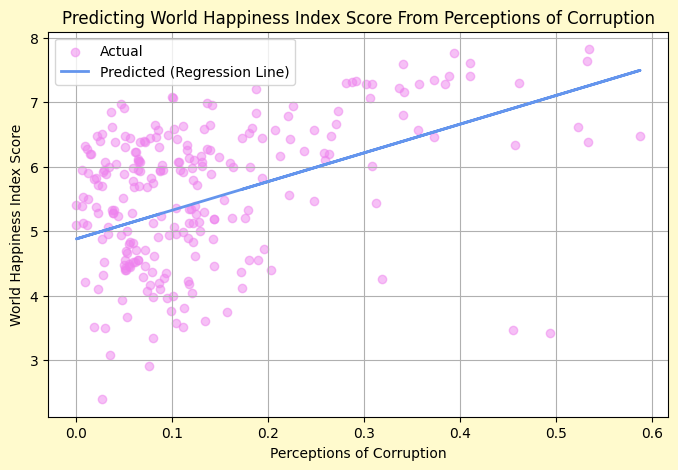

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define features (X) and target (y).
X = df[["Perceptions of Corruption"]]
y = df["Score"]

# Split into training and testing sets (80% train, 20% test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train the model.
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test set.
y_pred = model.predict(X_test)

# Evaluate performance (coefficent, intercept, MSE, and R^2 score).
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- MODEL EVALUATION ---")
print(f"Coefficent (Slope): {model.coef_[0]}" )
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}\n")

# Visualize results.
plt.figure(figsize = (8, 5), facecolor = "lemonchiffon")
plt.scatter(X_test, y_test, color = "violet", alpha = 0.5, label = "Actual")
plt.plot(X_test, y_pred, color = "cornflowerblue", linewidth = 2, label = "Predicted (Regression Line)")
plt.title("Predicting World Happiness Index Score From Perceptions of Corruption")
plt.xlabel("Perceptions of Corruption")
plt.ylabel("World Happiness Index Score")
plt.legend()
plt.grid(True)
plt.show()

In [33]:
IPython.display.HTML("<h2 style = 'font-weight: bold; padding: 10px; color: #FFF58A; text-align: center; font-family: sans-serif; background-color: #B3BFFF'>Train and Evaluate Model (Predicting World Happiness Index Score From Nominal GDP Per Capita)</h1>")

In [34]:
# Feature engineering! Get nominal GDP from "normalized" (real) GDP and deflator.
df["Nominal GDP"] = (df["GDP Per Capita"] * df["GDP Deflator Index Growth Rate"]) / 100

In [35]:
# Get the spread and variation of the Nominal GDP Per Capita feature.
print(f"\n--- NOMINAL GDP Per Capita ---")

min = df["Nominal GDP"].min()
print(f"Min: {min}")

max = df["Nominal GDP"].max()
print(f"Max: {max}")

range = max - min
print(f"Range: {range}")

quartile_1 = df["Nominal GDP"].quantile(0.25)
quartile_3 = df["Nominal GDP"].quantile(0.75)
interquartile_range = quartile_3 - quartile_1
print(f"IQR: {interquartile_range}")

standard_deviation = df["Nominal GDP"].std()
print(f"Standard Deviation: {standard_deviation}")


--- NOMINAL GDP Per Capita ---
Min: -0.4247930358956573
Max: 6.1568357680362285
Range: 6.581628803931886
IQR: 0.05521959420339116
Standard Deviation: 0.2307275944103836


--- MODEL EVALUATION ---
Coefficent (Slope): -0.38321653971561187
Intercept: 5.500674486934277
Mean Squared Error: 1.1680883534147053
R^2 Score: -0.014695337315812296



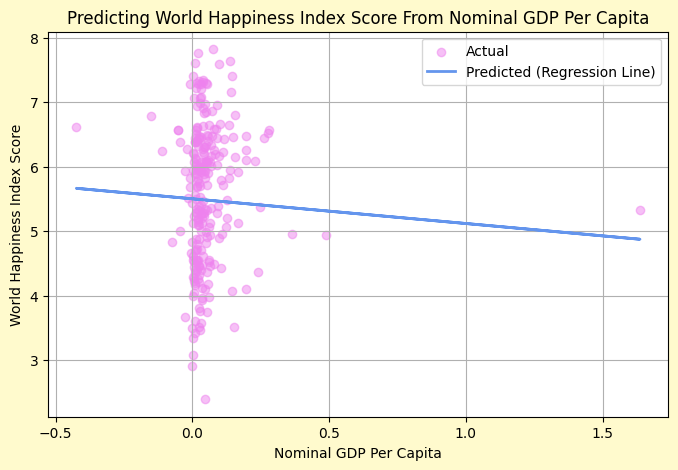

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define features (X) and target (y).
X = df[["Nominal GDP"]]
y = df["Score"]

# Split into training and testing sets (80% train, 20% test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train the model.
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test set.
y_pred = model.predict(X_test)

# Evaluate performance (coefficent, intercept, MSE, and R^2 score).
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- MODEL EVALUATION ---")
print(f"Coefficent (Slope): {model.coef_[0]}" )
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}\n")

# Visualize results.
plt.figure(figsize = (8, 5), facecolor = "lemonchiffon")
plt.scatter(X_test, y_test, color = "violet", alpha = 0.5, label = "Actual")
plt.plot(X_test, y_pred, color = "cornflowerblue", linewidth = 2, label = "Predicted (Regression Line)")
plt.title("Predicting World Happiness Index Score From Nominal GDP Per Capita")
plt.xlabel("Nominal GDP Per Capita")
plt.ylabel("World Happiness Index Score")
plt.legend()
plt.grid(True)
plt.show()

In [37]:
IPython.display.HTML("<h2 style = 'font-weight: bold; padding: 10px; color: #FFF58A; text-align: center; font-family: sans-serif; background-color: #B3BFFF'>Train and Evaluate Model (Predicting Nominal GDP Per Capita From Headline Consumer Price Inflation)</h1>")

--- MODEL EVALUATION ---
Coefficent (Slope): 56.84712352878224
Intercept: 3.859521302914866
Mean Squared Error: 249.4569749638098
R^2 Score: -0.1303161071890333



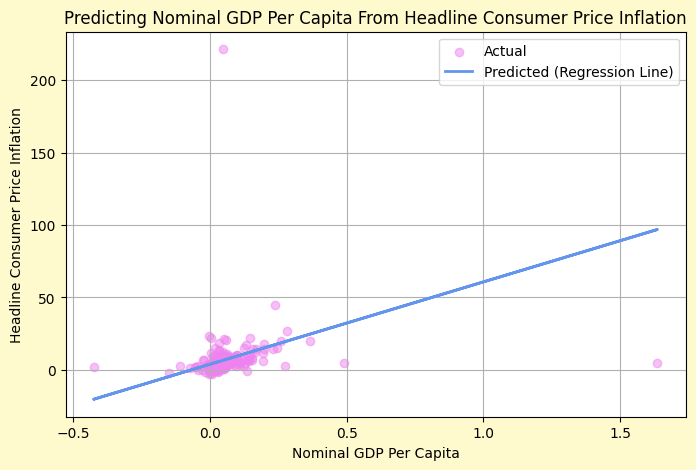

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define features (X) and target (y).
X = df[["Nominal GDP"]]
y = df["Headline Consumer Price Inflation"]

# Split into training and testing sets (80% train, 20% test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train the model.
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test set.
y_pred = model.predict(X_test)

# Evaluate performance (coefficent, intercept, MSE, and R^2 score).
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- MODEL EVALUATION ---")
print(f"Coefficent (Slope): {model.coef_[0]}" )
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}\n")

# Visualize results.
plt.figure(figsize = (8, 5), facecolor = "lemonchiffon")
plt.scatter(X_test, y_test, color = "violet", alpha = 0.5, label = "Actual")
plt.plot(X_test, y_pred, color = "cornflowerblue", linewidth = 2, label = "Predicted (Regression Line)")
plt.title("Predicting Nominal GDP Per Capita From Headline Consumer Price Inflation")
plt.xlabel("Nominal GDP Per Capita")
plt.ylabel("Headline Consumer Price Inflation")
plt.legend()
plt.grid(True)
plt.show()

In [39]:
IPython.display.HTML("<h1 style = 'font-weight: bold; padding: 15px; color: #DD7BDF; text-align: center; font-family: sans-serif; background-color: #FFBBE1'>Model 2: Decision Tree</h1>")

In [40]:
IPython.display.HTML("<h2 style = 'font-weight: bold; padding: 10px; color: #FFF58A; text-align: center; font-family: sans-serif; background-color: #B3BFFF'>Train and Evaluate Model</h1>")

In [41]:
average_score = df["Score"].mean()
print(f"Average World Happiness Index Score: {average_score}")

Average World Happiness Index Score: 5.499000649271104


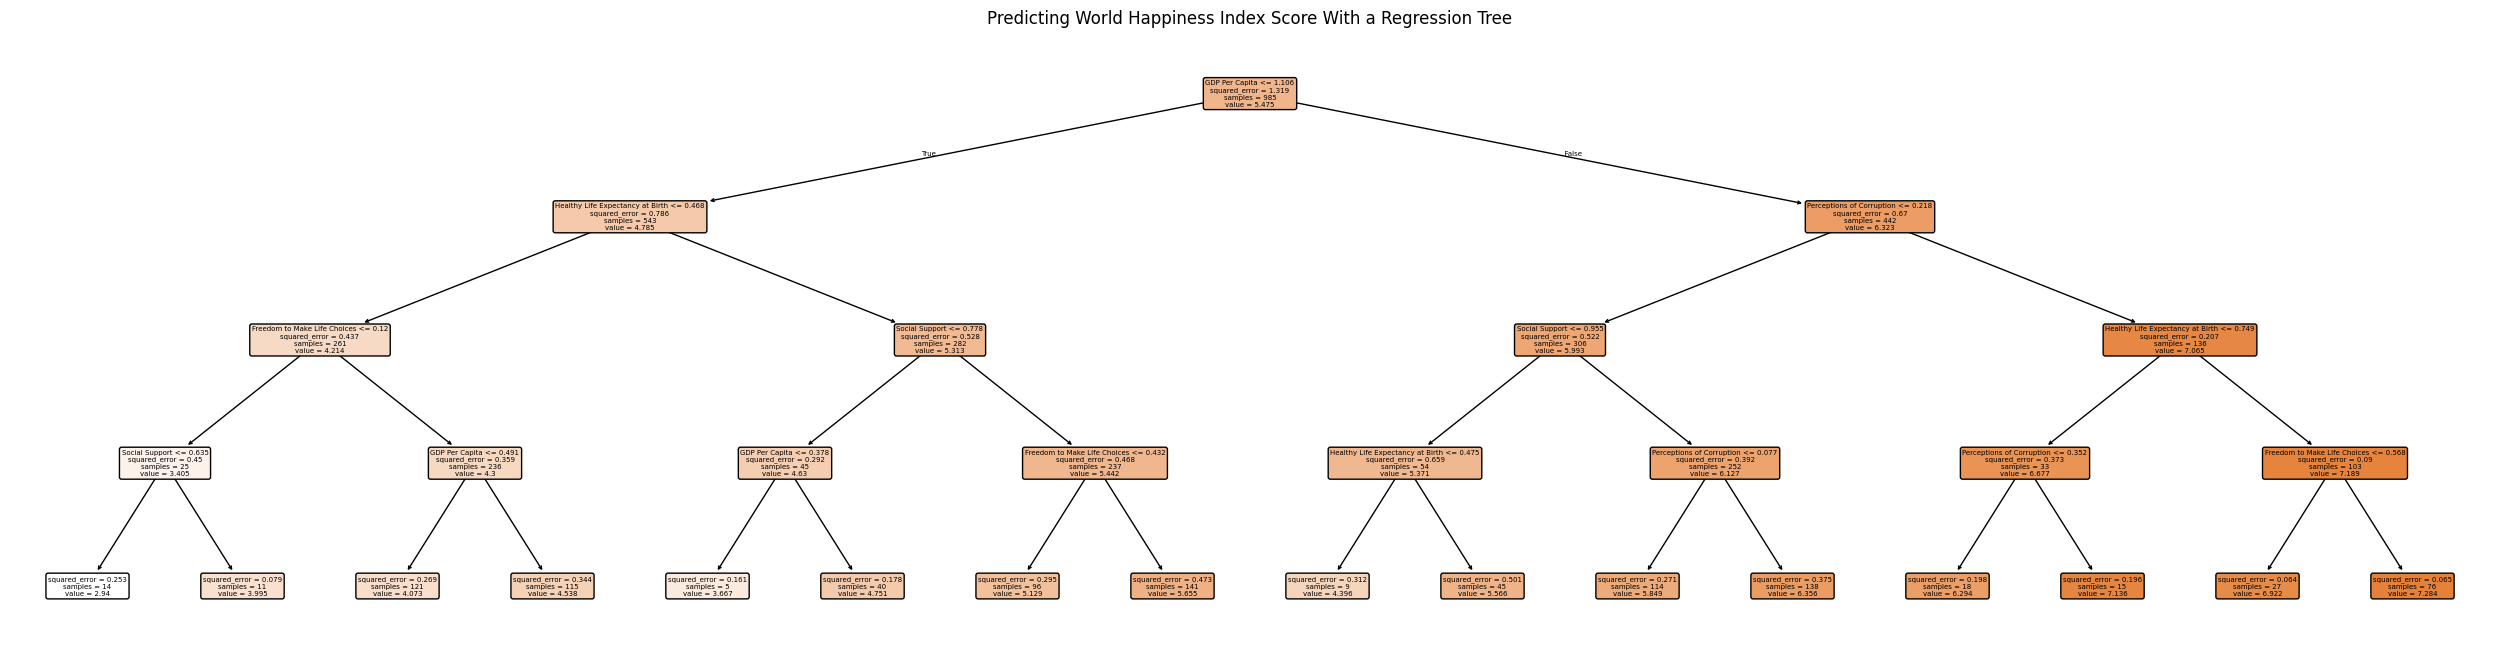


--- FEATURE IMPORTANCE ---
                              Feature  Importance
4                     GDP Per Capita    0.595402
6   Healthy Life Expectancy at Birth    0.180639
9          Perceptions of Corruption    0.130145
5                     Social Support    0.057211
7       Freedom to Make Life Choices    0.036604
0  Headline Consumer Price Inflation    0.000000
1    Energy Consumer Price Inflation    0.000000
3     GDP Deflator Index Growth Rate    0.000000
2      Food Consumer Price Inflation    0.000000
8                         Generosity    0.000000


--- ACCURACY FOR THE TRAINING SET ---
Mean Squared Error: 0.3051206683369263
R^2 Score: 0.7686984193230664
Root Mean Squared Error: 0.5523772880350226


--- ACCURACY FOR THE TESTING SET ---
Mean Squared Error: 0.3729030785852872
R^2 Score: 0.6760664430862056
Root Mean Squared Error: 0.6106579063479709


In [42]:
# This is a regression tree predicting World Happiness Index score using all features.

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Gather features into X.
X = df[["Headline Consumer Price Inflation",
        "Energy Consumer Price Inflation",
        "Food Consumer Price Inflation",
        "GDP Deflator Index Growth Rate",
        "GDP Per Capita",
        "Social Support",
        "Healthy Life Expectancy at Birth",
        "Freedom to Make Life Choices",
        "Generosity",
        "Perceptions of Corruption"]]
y = df["Score"]

# Split into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

# Train the decision tree.
model = DecisionTreeRegressor(
    # max_depth = 2,
    max_depth = 4,
    random_state = 42
)
model.fit(X_train, y_train)

# Visualize the tree.
plt.figure(figsize = (32, 8))
plot_tree(
    model,
    feature_names = X.columns,
    filled = True,
    rounded = True
)
plt.title("Predicting World Happiness Index Score With a Regression Tree")
plt.show()

# List feature importance.
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by = "Importance", ascending = False)

print("\n--- FEATURE IMPORTANCE ---\n", feature_importance)

print("\n")

# Evaluate model performance on the training set.
y_pred_train = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_train)

print("--- ACCURACY FOR THE TRAINING SET ---")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Root Mean Squared Error: {rmse}")

print("\n")

# Evaluate model performance on the testing set.
y_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print("--- ACCURACY FOR THE TESTING SET ---")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Root Mean Squared Error: {rmse}")

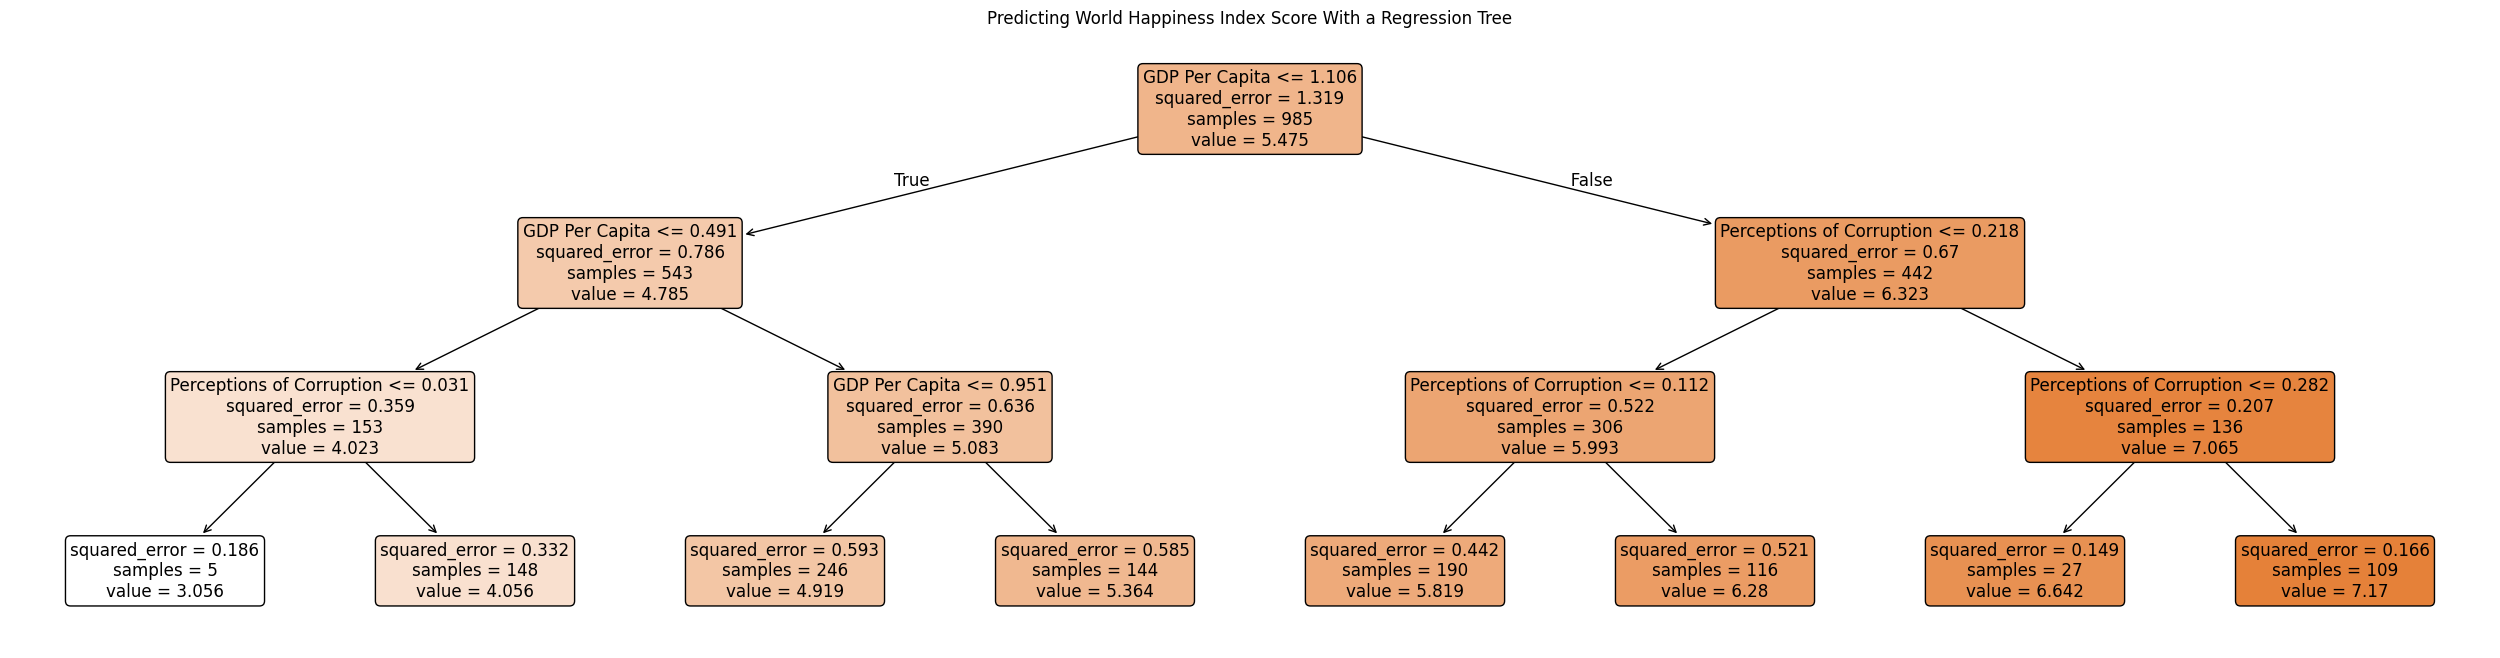


--- FEATURE IMPORTANCE ---
                      Feature  Importance
0             GDP Per Capita     0.84247
1  Perceptions of Corruption     0.15753


--- ACCURACY FOR THE TRAINING SET ---
Mean Squared Error: 0.45361939552586245
R^2 Score: 0.656126594823176
Root Mean Squared Error: 0.6735127285551941


--- ACCURACY FOR THE TESTING SET ---
Mean Squared Error: 0.5145239635057789
R^2 Score: 0.5530431707667154
Root Mean Squared Error: 0.7173032576991261


In [43]:
# This is a regression tree predicting World Happiness Index score using features with the highest feature importance and/or those related to finance.

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Gather features into X.
X = df[["GDP Per Capita",
        "Perceptions of Corruption"]]
y = df["Score"]

# Split into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

# Train the decision tree.
model = DecisionTreeRegressor(
    max_depth = 3,
    random_state = 42,
)
model.fit(X_train, y_train)

# Visualize the tree.
plt.figure(figsize = (32, 8))
plot_tree(
    model,
    feature_names = X.columns,
    filled = True,
    rounded = True
)
plt.title("Predicting World Happiness Index Score With a Regression Tree")
plt.show()

# List feature importance.
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by = "Importance", ascending = False)

print("\n--- FEATURE IMPORTANCE ---\n", feature_importance)

print("\n")

# Evaluate model performance on the training set.
y_pred_train = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_train)

print("--- ACCURACY FOR THE TRAINING SET ---")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Root Mean Squared Error: {rmse}")

print("\n")

# Evaluate model performance on the testing set.
y_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print("--- ACCURACY FOR THE TESTING SET ---")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Root Mean Squared Error: {rmse}")

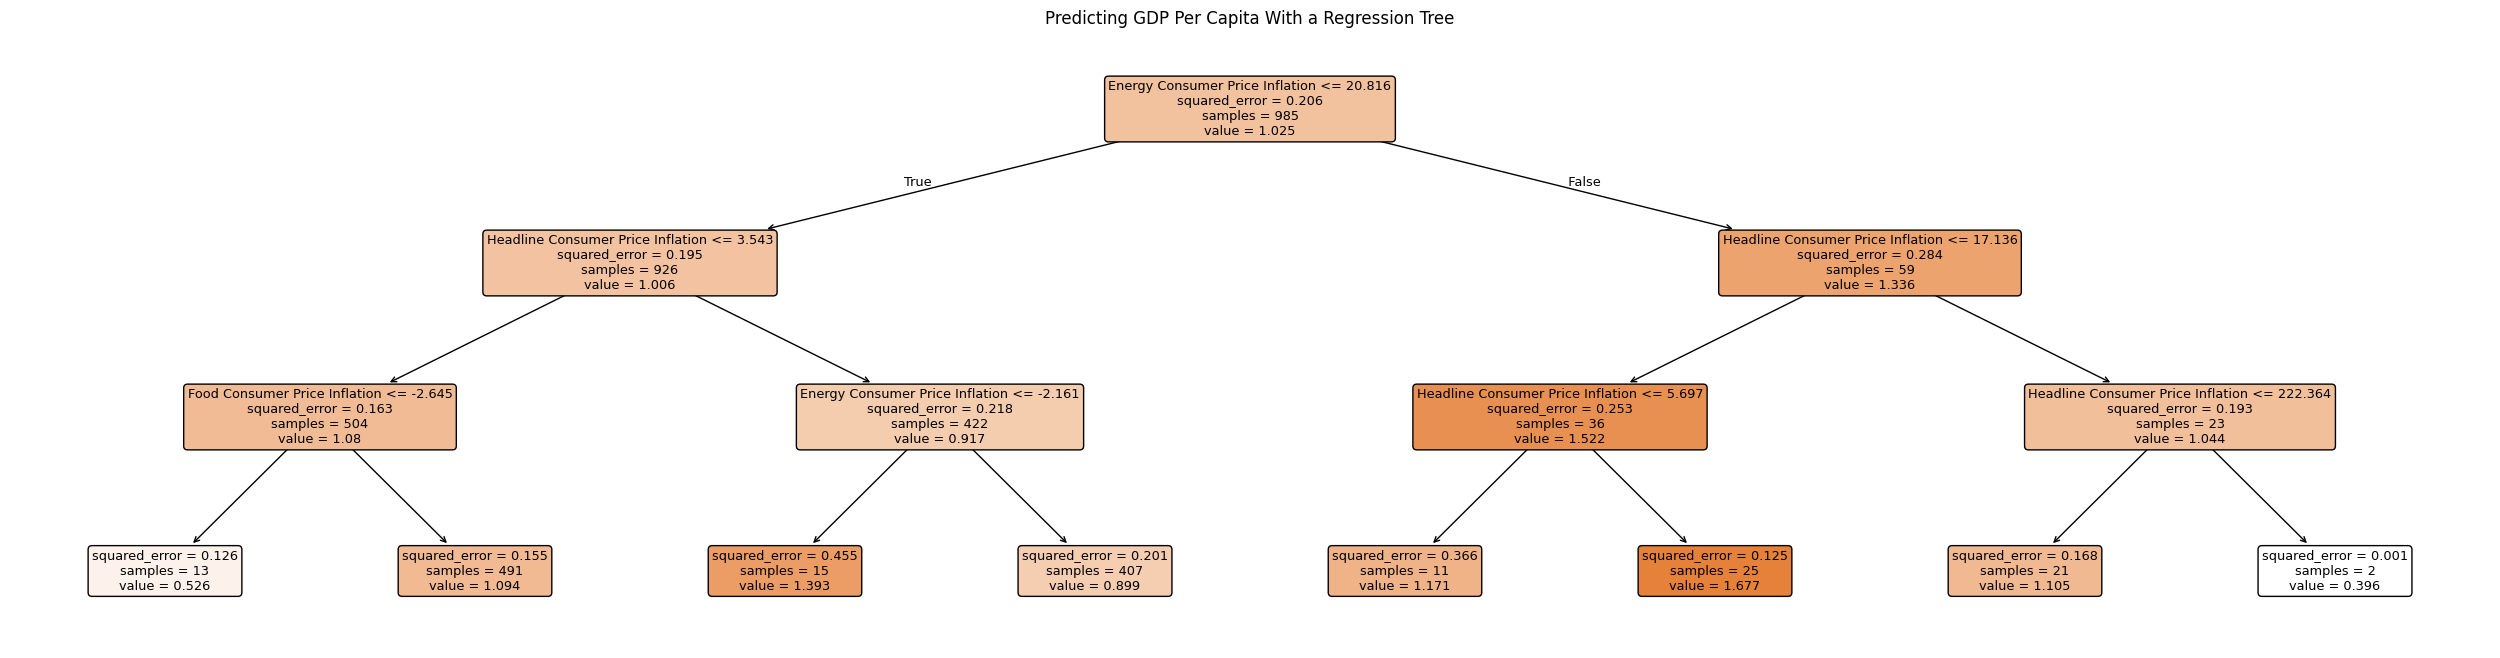


--- FEATURE IMPORTANCE ---
                              Feature  Importance
0  Headline Consumer Price Inflation    0.471191
1    Energy Consumer Price Inflation    0.370589
2      Food Consumer Price Inflation    0.158219


--- ACCURACY FOR THE TRAINING SET ---
Mean Squared Error: 0.17985189309829142
R^2 Score: 0.1272568938849945
Root Mean Squared Error: 0.42408948713483974


--- ACCURACY FOR THE TESTING SET ---
Mean Squared Error: 0.16579192979420126
R^2 Score: 0.15779730231788058
Root Mean Squared Error: 0.4071755515673814


In [44]:
# This is a regression tree predicting GDP per capita using features related to inflation rates.

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Gather features into X.
X = df[["Headline Consumer Price Inflation",
        "Energy Consumer Price Inflation",
        "Food Consumer Price Inflation"]]
y = df["GDP Per Capita"]

# Split into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

# Train the decision tree.
model = DecisionTreeRegressor(
    max_depth = 3,
    random_state = 42,
)
model.fit(X_train, y_train)

# Visualize the tree.
plt.figure(figsize = (32, 8))
plot_tree(
    model,
    feature_names = X.columns,
    filled = True,
    rounded = True
)
plt.title("Predicting GDP Per Capita With a Regression Tree")
plt.show()

# List feature importance.
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by = "Importance", ascending = False)

print("\n--- FEATURE IMPORTANCE ---\n", feature_importance)

print("\n")

# Evaluate model performance on the training set.
y_pred_train = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_train)

print("--- ACCURACY FOR THE TRAINING SET ---")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Root Mean Squared Error: {rmse}")

print("\n")

# Evaluate model performance on the testing set.
y_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print("--- ACCURACY FOR THE TESTING SET ---")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Root Mean Squared Error: {rmse}")